In [15]:
from q_lib import Q_learner
from WoLF_lib import WoLF_PHC
from JAL_AM_lib import JAL_AM, edge_or_focal
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from tqdm import tqdm

# Baseline

In [16]:
def run_sim( alpha, gamma, delta_l, delta_w, k, T, n):#(0.3,0.95,0.2,0.6,np.linspace(0,1,7),500000,100)
    """
    args:
        alpha: step-size parameter
        gamma: discount factor
        delta_l:
        delta_w:
        k: length of price action vector
        T: number of total simulations
        n: number of runs simulated
    returns:
        JAL_AM_res: list conating avg. profitabilities, avg. profit gain, counter for both edgeworth price cycles and focal pricing for JAL-AM
        Q_learner_res: list conating avg. profitabilities, avg. profit gain, counter for both edgeworth price cycles and focal pricing for Q-learning
        WoLF_PHC_res: list conating avg. profitabilities, avg. profit gain, counter for both edgeworth price cycles and focal pricing for WoLF-PHC
    """
    num_calcs=int(T/1000-1) # size of avg. profits 

    #JAL-AM
    summed_avg_profitabilities = np.zeros(num_calcs)
    avg_prof_gain = np.zeros((n))
    focal = 0
    edge = 0

    for i in tqdm(range(n), desc='JAL-AM 1/3', leave=True):
        p_table, avg_profs1, avg_profs2 = JAL_AM2(alpha, gamma, T, k)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        avg_prof_gain[i] = per_firm_profit[498]/0.125
        summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
        edge, focal, p_m = edge_or_focal(edge, focal, p_table)
    avg_avg_profitabilities = np.divide(summed_avg_profitabilities, n)
    JAL_AM_res=[avg_avg_profitabilities, avg_prof_gain, edge, focal]
    avg_avg_profitabilities=0

    #Q-learning
    summed_avg_profitabilities = np.zeros(num_calcs)
    avg_prof_gain = np.zeros((n))
    focal = 0
    edge = 0
    # simulating n runs of Klein_simulation
    for i in tqdm(range(n), desc='Q-learning 2/3', leave=True):
        p_table, avg_profs1, avg_profs2 = Q_learner(alpha, gamma, T, k)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        avg_prof_gain[i] = per_firm_profit[498]/0.125
        summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
        edge, focal, p_m = edge_or_focal(edge, focal, p_table)
    avg_avg_profitabilities = np.divide(summed_avg_profitabilities, n)
    Q_learner_res=[avg_avg_profitabilities, avg_prof_gain, edge, focal]
    avg_avg_profitabilities=0

    #WoLF-PHC
    summed_avg_profitabilities = np.zeros(num_calcs)
    avg_prof_gain = np.zeros((n))
    focal = 0
    edge = 0
    # simulating n runs of Klein_simulation avg_profs1, avg_profs2, p_table, policy_1, policy_2
    for i in tqdm(range(n), desc='WoLF-PHC 3/3', leave=True):# (0.3, 0.6, 0.2, 0.95, np.linspace(0,1,49), 500000)
        avg_profs1, avg_profs2, p_table, = WoLF_PHC(alpha, delta_l, delta_w, gamma, k, T)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        avg_prof_gain[i] = per_firm_profit[498]/0.125
        summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
        edge, focal, p_m = edge_or_focal(edge, focal, p_table)
    avg_avg_profitabilities = np.divide(summed_avg_profitabilities, n)
    WoLF_PHC_res=[avg_avg_profitabilities, avg_prof_gain, edge, focal]
    return JAL_AM_res,Q_learner_res, WoLF_PHC_res, n, len(k)

In [18]:
JAL_AM_res,Q_learner_res, WoLF_PHC_res, t, k=run_sim(0.3,0.95,0.2,0.6,np.linspace(0,1,7),500000,1000)

WoLF-PHC 3/3:  57%|█████▋    | 572/1000 [06:45<05:01,  1.42it/s]

In [4]:
JAL_AM_res24,Q_learner_res24, WoLF_PHC_res24, tt, k24=run_sim(0.3,0.95,0.2,0.6,np.linspace(0,1,25),500000,1000)

WoLF-PHC 3/3: 100%|██████████| 1000/1000 [31:15<00:00,  1.88s/it]   


### Profitability graph

In [9]:
def plot_profitability(t, k, JAL_AM_res, Q_learner_res, WoLF_PHC_res):
    fig, axs = plt.subplots(1, 1, figsize=(10,7))
    fig.suptitle("Average profitability for all in {} different runs, k={}".format(t, k-1))
    axs.set_xlabel("t")
    axs.set_ylabel("profitability")
    xs = np.linspace(0, 500000, 499)
    axs.set_ylim(0.05,0.125+(0.125*0.05))
    axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='black', linestyles='dashed', label='Joint profit maximizing')
    axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='grey', linestyles='dashed', label='Comp Benchmark')
    axs.plot(xs, JAL_AM_res[0], color="steelblue", label = "JAL-AM")
    axs.plot(xs, Q_learner_res[0], color="C3", label = "Q-learning")
    axs.plot(xs, WoLF_PHC_res[0], color="g", label = "WoLF-PHC")


    axs.legend()  # Show the legend to display the label of the newly added line
    plt.savefig(f'Graphs/baseline_prof{k}.png')
    plt.show()

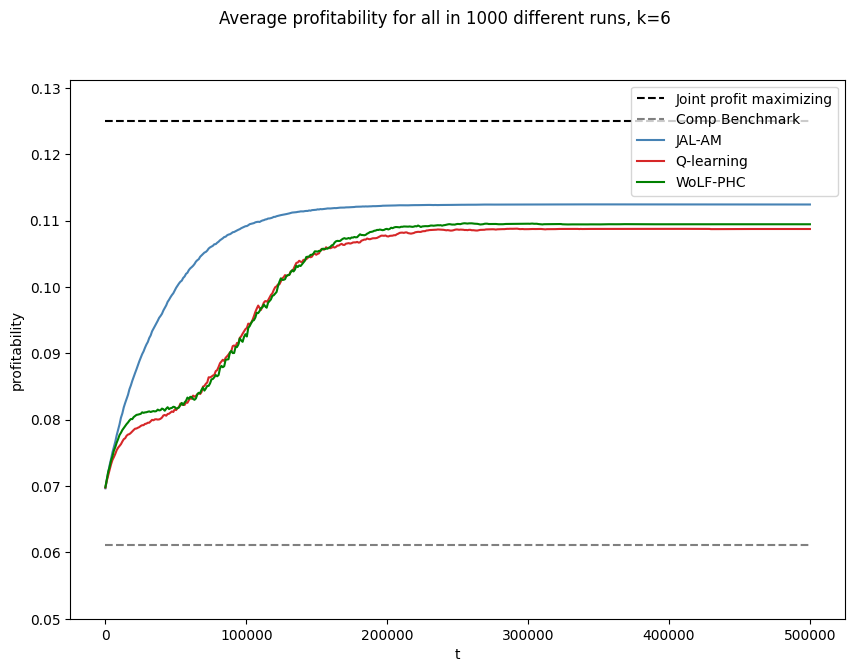

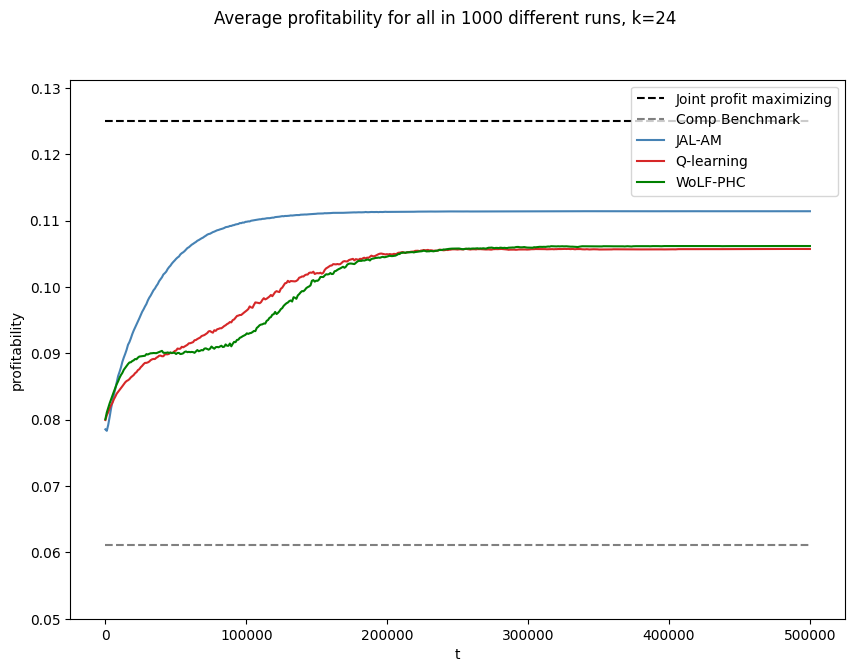

In [6]:
plot_profitability(t, k, JAL_AM_res, Q_learner_res, WoLF_PHC_res)
plot_profitability(tt, k24, JAL_AM_res24, Q_learner_res24, WoLF_PHC_res24)

In [7]:
print("Profitability JAL-AM (k=6):      ", JAL_AM_res[0][498])
print("Profitability Q-learning (k=6):  ", Q_learner_res[0][498])
print("Profitability WoLF-PHC (k=6):    ", WoLF_PHC_res[0][498])

print("Profitability JAL-AM (k=24):     ", JAL_AM_res24[0][498])
print("Profitability Q-learning (k=24): ", Q_learner_res24[0][498])
print("Profitability WoLF-PHC (k=24):   ", WoLF_PHC_res24[0][498])


Profitability JAL-AM (k=6):       0.11244137500000201
Profitability Q-learning (k=6):   0.1087473888888902
Profitability WoLF-PHC (k=6):     0.109462180555557
Profitability JAL-AM (k=24):      0.11142584635416702
Profitability Q-learning (k=24):  0.10573478472222211
Profitability WoLF-PHC (k=24):    0.10618170225694437


### Avg. profit gain graph

In [10]:
# Function to count values in each interval
def count_intervals(data, intervals):
    counts = np.zeros(len(intervals), dtype=int)
    for num in data:
        for i, interval in enumerate(intervals):
            if interval[0] < num <= interval[1]:
                counts[i] += 1
    return counts

In [11]:
def plot_avg_prof_gain(data1, data2, intervals, labels, algo, k_val):
    # Plot the counts for each interval for JAL_AM_res
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(intervals))
    bar1 = plt.bar(index - bar_width/2, data1, bar_width, label= f'k={k_val[0]}')
    bar2 = plt.bar(index + bar_width/2, data2, bar_width, label=f'k={k_val[1]}')
    
    plt.xticks(index, labels, rotation=45, ha='right')
    plt.xlabel('Δ')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Avg. Profit Gain for {algo}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'Graphs/avg_prof_gain_{algo}.png')
    plt.show()

In [12]:
gg = JAL_AM_res[1]
gg24 = JAL_AM_res24[1]
print(gg[-100:])
print(gg24[-100:])

[1.         1.         1.         0.88888889 0.77777778 0.88888889
 0.88888889 0.88888889 0.88888889 0.88888889 1.         1.
 0.88888889 1.         1.         0.88888889 1.         0.88888889
 0.88888889 0.91666667 1.         1.         1.         0.88888889
 0.88888889 1.         0.88888889 0.88888889 1.         0.88888889
 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889 1.
 0.88888889 0.88888889 0.88888889 1.         0.88888889 0.88888889
 0.88888889 1.         0.88888889 0.88888889 0.91666667 0.88888889
 0.88888889 0.88888889 0.74033333 0.88888889 1.         0.88888889
 0.77777778 0.91666667 0.74033333 0.88888889 1.         0.88888889
 0.88888889 0.80555556 0.88888889 0.74033333 0.77777778 0.88888889
 1.         0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.77777778 0.75       0.88888889 0.88888889 0.88888889 0.88888889
 0.91666667 0.77777778 0.88888889 0.91666667 0.88888889 0.88888889
 0.88888889

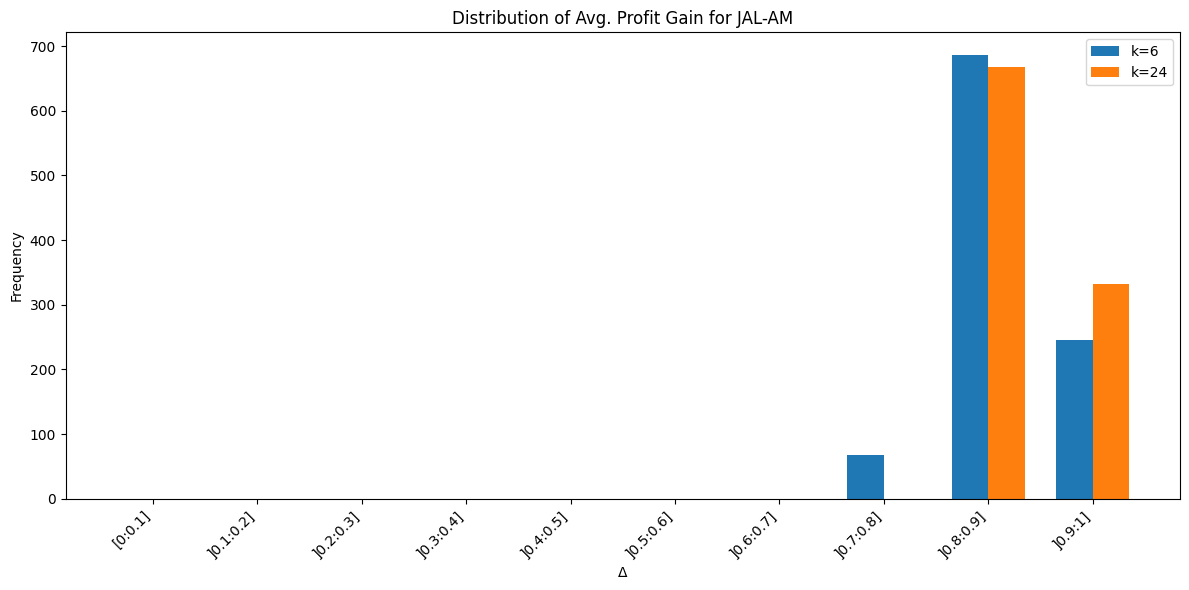

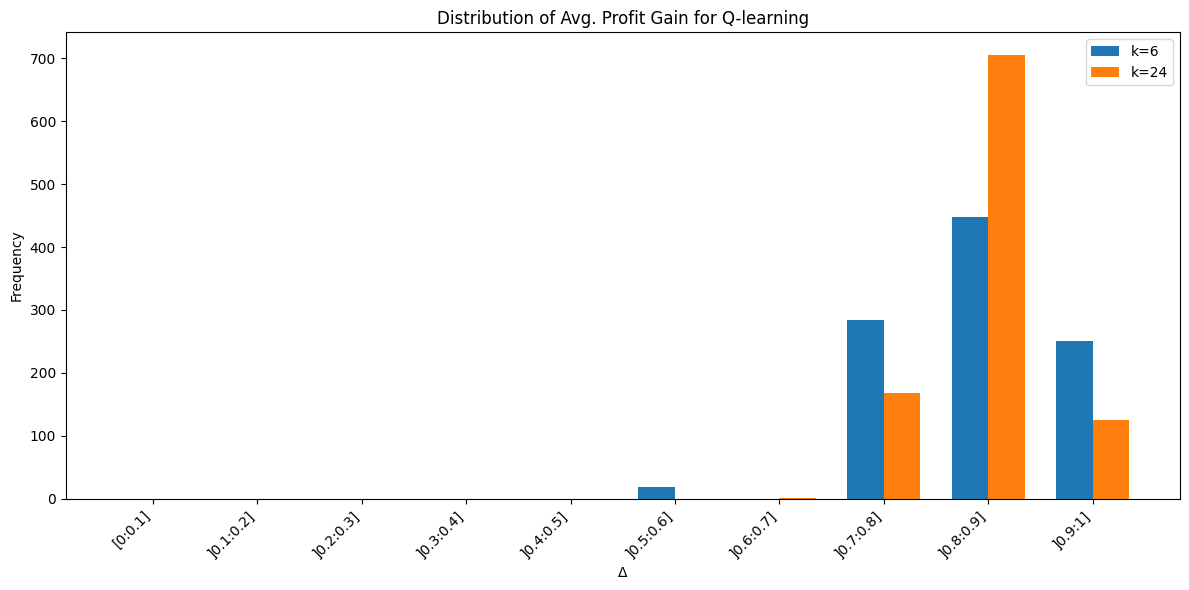

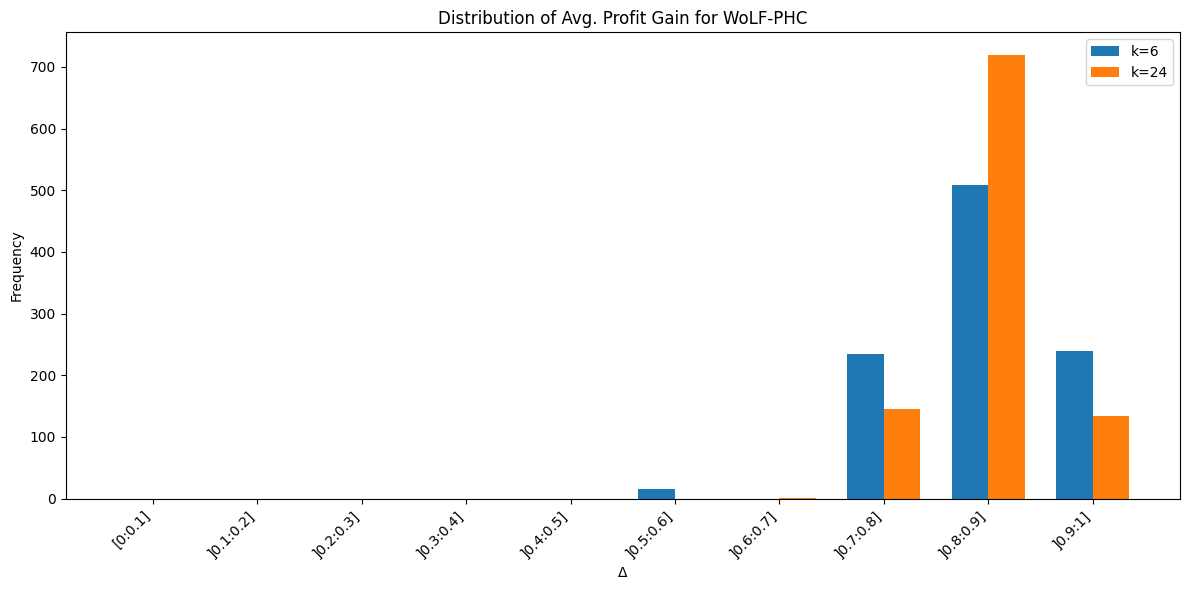

In [13]:
# Define the intervals
intervals = [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1)]
intervals_str = ['[0:0.1]',']0.1:0.2]',']0.2:0.3]', ']0.3:0.4]', ']0.4:0.5]', ']0.5:0.6]', ']0.6:0.7]', ']0.7:0.8]', ']0.8:0.9]', ']0.9:1]']

JAL_AM_prof_gain_k6 = count_intervals(JAL_AM_res[1], intervals)
JAL_AM_prof_gain_k24 = count_intervals(JAL_AM_res24[1], intervals)
plot_avg_prof_gain(JAL_AM_prof_gain_k6, JAL_AM_prof_gain_k24, intervals, intervals_str, 'JAL-AM', [6, 24])

Q_prof_gain_k6 = count_intervals(Q_learner_res[1], intervals)
Q_prof_gain_k24 = count_intervals(Q_learner_res24[1], intervals)
plot_avg_prof_gain(Q_prof_gain_k6, Q_prof_gain_k24, intervals, intervals_str, 'Q-learning', [6, 24])

WoLF_PHC_prof_gain_k6 = count_intervals(WoLF_PHC_res[1], intervals)
WoLF_PHC_prof_gain_k24 = count_intervals(WoLF_PHC_res24[1], intervals)
plot_avg_prof_gain(WoLF_PHC_prof_gain_k6, WoLF_PHC_prof_gain_k24, intervals, intervals_str, 'WoLF-PHC', [6, 24])

### Edgeworth price cycles & focal pricing

In [14]:
def plot_edge_focal(edgeworth_data, focal_data, k):
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Define the positions for the groups
    index = np.arange(2)  # We have two categories
    bar_width = 0.2  # Width of each bar
    # Define the positions for each bar in the group
    positions_JAL_AM = index - bar_width
    positions_Q = index
    positions_WoLF_PHC = index + bar_width
    # Plotting
    bar1 = ax.bar(positions_JAL_AM[0], edgeworth_data[0], bar_width, label='JAL-AM', color='steelblue')
    bar2 = ax.bar(positions_Q[0], edgeworth_data[1], bar_width, label='Q-learning', color='C3')
    bar3 = ax.bar(positions_WoLF_PHC[0], edgeworth_data[2], bar_width, label='WoLF-PHC', color='g')

    bar4 = ax.bar(positions_JAL_AM[1], focal_data[0], bar_width, label='JAL-AM',color='steelblue')
    bar5 = ax.bar(positions_Q[1], focal_data[1], bar_width, label='Q-learning', color='C3')
    bar6 = ax.bar(positions_WoLF_PHC[1], focal_data[2], bar_width, label='WoLF-PHC', color='g')

    # Labels and title
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Edgeworth Price Cycles and Focal Pricing, k={k}')
    ax.set_xticks(index)
    ax.set_xticklabels(['Edgeworth Price Cycles', 'Focal Pricing'])
    ax.legend(['JAL-AM', 'Q-learning', 'WoLF-PHC'])

    # Display the plot
    plt.tight_layout()
    plt.savefig(f'Graphs/edgeworth_focal_k{k}.png')
    plt.show()

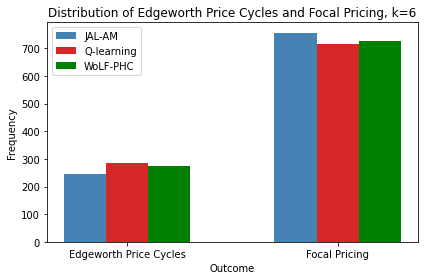

In [88]:
edgeworth_data = [JAL_AM_res[2], Q_learner_res[2], WoLF_PHC_res[2]]
focal_data = [JAL_AM_res[3], Q_learner_res[3], WoLF_PHC_res[3]]

plot_edge_focal(edgeworth_data, focal_data, 6)

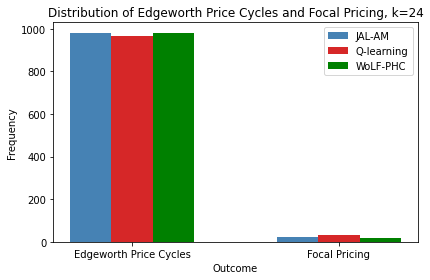

In [97]:
edgeworth_data24 = [JAL_AM_res24[2], Q_learner_res24[2], WoLF_PHC_res24[2]]
focal_data24 = [JAL_AM_res24[3], Q_learner_res24[3], WoLF_PHC_res24[3]]

plot_edge_focal(edgeworth_data24, focal_data24, 24)

## Asymmetric information

# Average profit gain

## Baseline

## Asymmetric information

# Edgeworth cycles

## Baseline

## Asymmetric information